In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from random import shuffle
import tflearn
from tqdm import tqdm
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression

C:\Users\Jeet J\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [21]:
# Renaming the Images of Orange
folder = "C:\\Users\Jeet J\AnacondaProjects\Internship\Orange\\"
i=0

for filename in os.listdir(folder):
    dst =str(i) + ".Orange.jpg" 
    src ='C:\\Users\Jeet J\AnacondaProjects\Internship\Orange\\'+ filename
    dst ='C:\\Users\Jeet J\AnacondaProjects\Internship\Orange\\'+ dst      
    os.rename(src, dst)
    i += 1    

In [22]:
# Renaming the Images of Apple
folder = "C:\\Users\Jeet J\AnacondaProjects\Internship\Apple\\"
i=0

for filename in os.listdir(folder):
    dst = str(i) + ".Apple.jpg"
    src ='C:\\Users\Jeet J\AnacondaProjects\Internship\Apple\\'+ filename
    dst ='C:\\Users\Jeet J\AnacondaProjects\Internship\Apple\\'+ dst      
    os.rename(src, dst)
    i += 1  

In [54]:
# Renaming the Images of Banana
folder = "C:\\Users\Jeet J\AnacondaProjects\Internship\Banana\\"
i=0

for filename in os.listdir(folder):
    dst = str(i) + ".Banana.jpg"
    src ='C:\\Users\Jeet J\AnacondaProjects\Internship\Banana\\'+ filename
    dst ='C:\\Users\Jeet J\AnacondaProjects\Internship\Banana\\'+ dst      
    os.rename(src, dst)
    i += 1  

In [2]:
def create_label(image_name):
    word_label = image_name.split('.')[-2]
#     word_label = image_name[:6]
    if word_label == 'Orange':
        return np.array([1,0,0])
    elif word_label == 'Apple':
        return np.array([0,1,0])
    elif word_label == 'Banana':
        return np.array([0,0,1])

In [3]:
train_dir = "C:\\Users\Jeet J\AnacondaProjects\Internship\Train_data"
test_dir = "C:\\Users\Jeet J\AnacondaProjects\Internship\Test_data"

def create_train_data():
    training_data = []
    for img in tqdm(os.listdir(train_dir)):
#         print(img)
        path = os.path.join(train_dir, img)
        img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img_data = cv2.resize(img_data, (50, 50))
        training_data.append([np.array(img_data), create_label(img)])
        print(create_label(img))
#         print(1)
#         print()
    shuffle(training_data)
    np.save('train_data', training_data)
    return training_data

def create_test_data():
    testing_data = []
    for img in tqdm(os.listdir(test_dir)):
        path = os.path.join(test_dir,img)
        img_num = img.split('.')[0]
        img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img_data = cv2.resize(img_data, (50, 50))
        testing_data.append([np.array(img_data), img_num])
        
    shuffle(testing_data)
    np.save('test_data', testing_data)
    return testing_data

In [16]:
train_data = create_train_data()
test_data = create_test_data()

  0%|                                                                                         | 0/1338 [00:00<?, ?it/s]

[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 0 1]
[1 0 0]
[0 0 1]
[1 0 0]
[0 0 1]
[1 0 0]
[0 0 1]
[1 0 0]
[0 0 1]
[1 0 0]
[0 0 1]
[1 0 0]
[0 0 1]


  2%|█▎                                                                             | 22/1338 [00:00<00:06, 213.45it/s]

[1 0 0]
[0 0 1]
[1 0 0]
[0 0 1]
[1 0 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 0 1]
[1 0 0]
[0 0 1]
[1 0 0]
[0 0 1]
[1 0 0]
[0 0 1]
[1 0 0]
[0 0 1]


  3%|██▍                                                                            | 41/1338 [00:00<00:06, 199.86it/s]

[1 0 0]
[0 0 1]
[1 0 0]
[0 0 1]
[1 0 0]
[0 0 1]
[1 0 0]
[0 0 1]
[1 0 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 0 1]
[1 0 0]
[0 0 1]


  4%|███▍                                                                           | 58/1338 [00:00<00:06, 189.41it/s]

[1 0 0]
[0 0 1]
[1 0 0]
[0 0 1]
[1 0 0]
[0 0 1]
[1 0 0]
[0 0 1]
[1 0 0]
[0 0 1]
[1 0 0]
[0 0 1]
[1 0 0]
[0 0 1]
[1 0 0]
[0 0 1]
[1 0 0]
[0 1 0]


  6%|████▍                                                                          | 76/1338 [00:00<00:06, 186.60it/s]

[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]


  7%|█████▌                                                                         | 95/1338 [00:00<00:06, 186.51it/s]

[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]


  9%|██████▋                                                                       | 114/1338 [00:00<00:06, 186.45it/s]

[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]


 10%|███████▊                                                                      | 134/1338 [00:00<00:06, 186.76it/s]

[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[1 0 0]
[0 1 0]
[1 0 0]
[0 1 0]
[1 0 0]
[0 1 0]
[1 0 0]
[0 1 0]


 11%|████████▉                                                                     | 153/1338 [00:00<00:06, 185.32it/s]

[1 0 0]
[0 1 0]
[1 0 0]
[0 1 0]
[1 0 0]
[0 1 0]
[1 0 0]
[0 1 0]
[1 0 0]
[0 1 0]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[1 0 0]
[0 1 0]
[1 0 0]
[0 1 0]


 13%|██████████                                                                    | 172/1338 [00:00<00:06, 185.61it/s]

[1 0 0]
[0 1 0]
[1 0 0]
[0 1 0]
[1 0 0]
[0 1 0]
[1 0 0]
[0 1 0]
[1 0 0]
[0 1 0]
[1 0 0]
[0 1 0]
[1 0 0]
[0 1 0]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]


 14%|███████████                                                                   | 190/1338 [00:01<00:06, 185.05it/s]

[0 1 0]
[1 0 0]
[0 1 0]
[1 0 0]
[0 1 0]
[1 0 0]
[0 1 0]
[1 0 0]
[0 1 0]
[1 0 0]
[0 1 0]
[1 0 0]
[0 1 0]
[1 0 0]
[0 1 0]
[1 0 0]
[0 1 0]
[1 0 0]
[0 1 0]


 16%|████████████▏                                                                 | 209/1338 [00:01<00:06, 184.99it/s]

[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]


 17%|█████████████▎                                                                | 228/1338 [00:01<00:06, 184.78it/s]

[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]


 19%|██████████████▌                                                               | 249/1338 [00:01<00:05, 186.11it/s]

[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]


 20%|███████████████▋                                                              | 269/1338 [00:01<00:05, 186.80it/s]

[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]


 22%|████████████████▊                                                             | 288/1338 [00:01<00:05, 186.88it/s]

[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]


 23%|█████████████████▉                                                            | 308/1338 [00:01<00:05, 187.33it/s]

[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]


 25%|███████████████████                                                           | 328/1338 [00:01<00:05, 187.72it/s]

[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]


 26%|████████████████████▎                                                         | 348/1338 [00:01<00:05, 188.18it/s]

[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]


 28%|█████████████████████▍                                                        | 368/1338 [00:01<00:05, 188.78it/s]

[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]


 29%|██████████████████████▌                                                       | 388/1338 [00:02<00:05, 189.04it/s]

[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]


 30%|███████████████████████▊                                                      | 408/1338 [00:02<00:04, 188.15it/s]

[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]


 32%|████████████████████████▉                                                     | 428/1338 [00:02<00:04, 188.66it/s]

[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]


 33%|██████████████████████████                                                    | 448/1338 [00:02<00:04, 188.90it/s]

[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]


 35%|███████████████████████████▎                                                  | 468/1338 [00:02<00:04, 189.03it/s]

[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]


 36%|████████████████████████████▍                                                 | 488/1338 [00:02<00:04, 189.38it/s]

[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]


 38%|█████████████████████████████▌                                                | 508/1338 [00:02<00:04, 189.42it/s]

[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]


 39%|██████████████████████████████▊                                               | 528/1338 [00:02<00:04, 189.66it/s]

[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]


 41%|███████████████████████████████▉                                              | 548/1338 [00:02<00:04, 189.88it/s]

[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]


 42%|█████████████████████████████████                                             | 568/1338 [00:02<00:04, 189.58it/s]

[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]


 44%|██████████████████████████████████▎                                           | 588/1338 [00:03<00:03, 189.54it/s]

[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]


 45%|███████████████████████████████████▍                                          | 608/1338 [00:03<00:03, 189.63it/s]

[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]


 47%|████████████████████████████████████▌                                         | 628/1338 [00:03<00:03, 189.59it/s]

[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]


 48%|█████████████████████████████████████▊                                        | 648/1338 [00:03<00:03, 189.56it/s]

[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]


 50%|██████████████████████████████████████▉                                       | 667/1338 [00:03<00:03, 189.57it/s]

[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]


 51%|███████████████████████████████████████▉                                      | 686/1338 [00:03<00:03, 189.58it/s]

[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]


 53%|█████████████████████████████████████████▏                                    | 706/1338 [00:03<00:03, 189.85it/s]

[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]


 54%|██████████████████████████████████████████▎                                   | 726/1338 [00:03<00:03, 190.07it/s]

[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]


 56%|███████████████████████████████████████████▍                                  | 746/1338 [00:03<00:03, 190.03it/s]

[1 0 0]
[0 1 0]
[1 0 0]
[0 1 0]
[1 0 0]
[0 1 0]
[1 0 0]
[0 1 0]
[1 0 0]
[0 1 0]
[1 0 0]
[0 1 0]
[1 0 0]
[0 1 0]
[1 0 0]
[0 1 0]
[1 0 0]
[0 1 0]
[1 0 0]
[0 1 0]


 57%|████████████████████████████████████████████▋                                 | 766/1338 [00:04<00:03, 189.94it/s]

[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[1 0 0]
[0 1 0]
[1 0 0]
[0 1 0]
[1 0 0]
[0 1 0]
[1 0 0]
[0 1 0]
[1 0 0]
[0 1 0]
[1 0 0]
[0 1 0]
[1 0 0]
[0 1 0]
[1 0 0]


 59%|█████████████████████████████████████████████▊                                | 786/1338 [00:04<00:02, 189.86it/s]

[0 1 0]
[1 0 0]
[0 1 0]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[1 0 0]
[0 1 0]
[1 0 0]
[0 1 0]
[1 0 0]
[0 1 0]
[1 0 0]
[0 1 0]
[1 0 0]
[0 1 0]
[1 0 0]


 60%|██████████████████████████████████████████████▉                               | 805/1338 [00:04<00:02, 189.81it/s]

[0 1 0]
[1 0 0]
[0 1 0]
[1 0 0]
[0 1 0]
[1 0 0]
[0 1 0]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]


 62%|████████████████████████████████████████████████                              | 824/1338 [00:04<00:02, 189.81it/s]

[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]


 63%|█████████████████████████████████████████████████▏                            | 844/1338 [00:04<00:02, 190.00it/s]

[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]


 65%|██████████████████████████████████████████████████▍                           | 865/1338 [00:04<00:02, 190.31it/s]

[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]


 66%|███████████████████████████████████████████████████▋                          | 886/1338 [00:04<00:02, 190.57it/s]

[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]


 68%|████████████████████████████████████████████████████▊                         | 907/1338 [00:04<00:02, 190.85it/s]

[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]


 69%|██████████████████████████████████████████████████████                        | 927/1338 [00:04<00:02, 191.00it/s]

[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]


 71%|███████████████████████████████████████████████████████▏                      | 947/1338 [00:04<00:02, 190.95it/s]

[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]


 72%|████████████████████████████████████████████████████████▎                     | 967/1338 [00:05<00:01, 190.97it/s]

[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]


 74%|█████████████████████████████████████████████████████████▌                    | 987/1338 [00:05<00:01, 190.77it/s]

[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]


 75%|█████████████████████████████████████████████████████████▉                   | 1007/1338 [00:05<00:01, 190.62it/s]

[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]


 77%|███████████████████████████████████████████████████████████                  | 1026/1338 [00:05<00:01, 190.61it/s]

[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]


 78%|████████████████████████████████████████████████████████████▏                | 1046/1338 [00:05<00:01, 190.67it/s]

[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]


 80%|█████████████████████████████████████████████████████████████▎               | 1066/1338 [00:05<00:01, 190.84it/s]

[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]


 81%|██████████████████████████████████████████████████████████████▍              | 1086/1338 [00:05<00:01, 190.96it/s]

[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]


 83%|███████████████████████████████████████████████████████████████▋             | 1107/1338 [00:05<00:01, 191.19it/s]

[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]


 84%|████████████████████████████████████████████████████████████████▉            | 1128/1338 [00:05<00:01, 191.41it/s]

[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]


 86%|██████████████████████████████████████████████████████████████████           | 1148/1338 [00:05<00:00, 191.48it/s]

[1 0 0]
[0 0 1]
[1 0 0]
[0 0 1]
[1 0 0]
[0 0 1]
[1 0 0]
[0 0 1]
[1 0 0]
[0 0 1]
[1 0 0]
[0 0 1]
[1 0 0]
[0 0 1]
[1 0 0]
[0 0 1]
[1 0 0]
[0 0 1]
[0 0 1]
[0 1 0]
[0 0 1]


 87%|███████████████████████████████████████████████████████████████████▎         | 1169/1338 [00:06<00:00, 191.66it/s]

[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]


 89%|████████████████████████████████████████████████████████████████████▍        | 1190/1338 [00:06<00:00, 191.86it/s]

[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]


 91%|█████████████████████████████████████████████████████████████████████▋       | 1211/1338 [00:06<00:00, 191.96it/s]

[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]


 92%|██████████████████████████████████████████████████████████████████████▉      | 1232/1338 [00:06<00:00, 192.24it/s]

[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]


 94%|████████████████████████████████████████████████████████████████████████     | 1253/1338 [00:06<00:00, 192.45it/s]

[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]


 95%|█████████████████████████████████████████████████████████████████████████▎   | 1274/1338 [00:06<00:00, 192.66it/s]

[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]


 97%|██████████████████████████████████████████████████████████████████████████▌  | 1295/1338 [00:06<00:00, 192.74it/s]

[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]


 98%|███████████████████████████████████████████████████████████████████████████▋ | 1316/1338 [00:06<00:00, 192.80it/s]

[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]


100%|████████████████████████████████████████████████████████████████████████████▉| 1337/1338 [00:06<00:00, 192.88it/s]

[1 0 0]


100%|██████████████████████████████████████████████████████████████████████████████| 170/170 [00:00<00:00, 1035.85it/s]


In [17]:
train = train_data[:-438]
test = train_data[-438:]
X_train = np.array([i[0] for i in train]).reshape(-1, 50, 50, 1)
y_train = [i[1] for i in train]

X_test = np.array([i[0] for i in test]).reshape(-1, 50, 50, 1)
y_test = [i[1] for i in test]

In [18]:
tf.reset_default_graph()
convnet = input_data(shape=[None, 50, 50, 1], name='input')
convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 128, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)
convnet = fully_connected(convnet, 3, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate= 1e-3, loss='categorical_crossentropy', name='targets')
model = tflearn.DNN(convnet, tensorboard_dir='log', tensorboard_verbose=0)
model.fit({'input': X_train}, {'targets': y_train}, n_epoch=5, 
        validation_set=({'input': X_test}, {'targets': y_test}), 
          snapshot_step=100, show_metric=True, run_id= 'Apple vs Orange')

Training Step: 74  | total loss: 0.02454 | time: 4.317s
| Adam | epoch: 005 | loss: 0.02454 - acc: 0.9923 -- iter: 896/900
Training Step: 75  | total loss: 0.02191 | time: 5.680s
| Adam | epoch: 005 | loss: 0.02191 - acc: 0.9932 | val_loss: 0.00032 - val_acc: 1.0000 -- iter: 900/900
--


Apple: 0.00019464880460873246, Orange: 0.9997976422309875, Banana: 7.693114639550913e-06


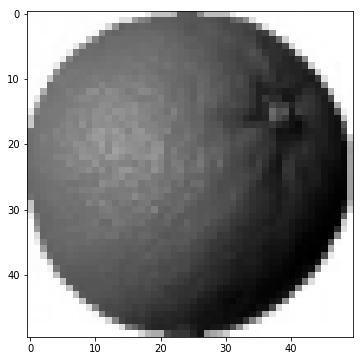

In [19]:
%matplotlib inline
d = test_data[0]
img_data, img_num = d

data = img_data.reshape(50, 50, 1)
prediction = model.predict([data])[0]

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.imshow(img_data, cmap="gray")
print(f"Apple: {prediction[1]}, Orange: {prediction[0]}, Banana: {prediction[2]}")

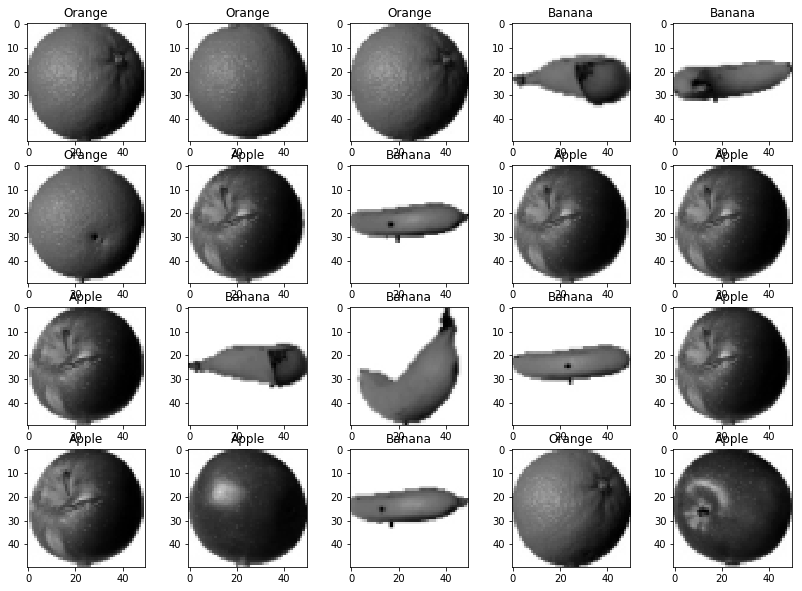

In [23]:
fig=plt.figure(figsize=(14, 10))

for num, data in enumerate(test_data[:20]):
#     print(num)
    img_num = data[1]
    img_data = data[0]
    
    y = fig.add_subplot(4, 5, num+1)
    orig = img_data
    data = img_data.reshape(50, 50, 1)
    model_out = model.predict([data])[0]
#     print(model_out)
    
    if np.argmax(model_out) == 1: 
        str_label='Apple'
    elif np.argmax(model_out) == 0:
        str_label='Orange'
    else :
        str_label='Banana'
        
    y.imshow(orig, cmap='gray')
    plt.title(str_label)
plt.show()